In [279]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ranksums
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, roc_curve, precision_recall_curve, auc
import seaborn as sns
sns.set_theme()
import matplotlib
matplotlib.rc('font', **{'size':16})
from matplotlib.ticker import FormatStrFormatter, MaxNLocator

In [2]:
# load data
df_original = pd.read_csv("data/GW3_data.csv")
df_meta_original = pd.read_csv("data/GW3_meta.csv")

In [3]:
df_original

,Unnamed: 0,TSPAN6,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,NFYA,...,ENSG00000279463,ENSG00000259582,ENSG00000266466,ENSG00000269014,ENSG00000275557,ENSG00000276144,SNORD114-7,ZNF965P,GOLGA8K,GOLGA8J
0,ATGAGTATTCAA,0.0,9.084823,9.084823,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,GGTCACAACTGT,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ACAGGTACTTAG,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,GCGTACTTTCGG,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ATTTCACAAGTA,0.0,10.279884,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15061,GCAACCGGATAC,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15062,GAGCCTGAGGAT,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15063,CTTTCTTTGTGC,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,8.806799,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15064,TCTATGCCTCGC,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df_meta_original

,Cell,Unnamed: 0,Cluster,Subcluster,Donor,Layer,Gestation_week,Index,Library,Number_genes_detected,Number_UMI,Percentage_mitochondrial,S_phase_score,G2M_phase_score,Phase,X,tSNE_1,tSNE_2
0,ATGAGTATTCAA,16149,ExM,ExM_3,371,CP,17,N712,Geschwind,1178,1846,1.36,0.0540,-0.065,S,ATGAGTATTCAA,21.464093,-8.468657
1,GGTCACAACTGT,6040,ExDp1,ExDp1_0,368,CP,17,N709,Plath,564,786,4.07,-0.1100,-0.110,G1,GGTCACAACTGT,22.552472,16.709793
2,ACAGGTACTTAG,2800,ExM,ExM_0,368,CP,17,N706,Plath,1592,3254,4.09,-0.0110,-0.084,G1,ACAGGTACTTAG,8.905517,-0.975167
3,GCGTACTTTCGG,9212,ExM,ExM_1,370,CP,18,N702,Geschwind,858,1200,2.00,-0.0410,-0.110,G1,GCGTACTTTCGG,8.829176,10.643510
4,ATTTCACAAGTA,30021,ExM,ExM_2,372,CP,18,N724,Geschwind,948,1611,2.48,-0.0850,-0.130,G1,ATTTCACAAGTA,16.002025,-7.907149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15061,GCAACCGGATAC,19824,ExN,ExN_7,371,GZ,17,N714,Geschwind,338,424,1.18,-0.0740,-0.058,G1,GCAACCGGATAC,15.227287,14.341716
15062,GAGCCTGAGGAT,16337,ExM-U,ExM-U_3,371,CP,17,N712,Geschwind,934,1479,1.28,-0.0079,-0.070,G1,GAGCCTGAGGAT,12.725596,-21.085502
15063,CTTTCTTTGTGC,5556,ExM,ExM_0,368,CP,17,N709,Plath,1173,2238,4.11,-0.0470,-0.110,G1,CTTTCTTTGTGC,20.322304,3.874512
15064,TCTATGCCTCGC,21506,ExM,ExM_0,372,CP,18,N715,Geschwind,879,1345,4.39,-0.0980,-0.068,G1,TCTATGCCTCGC,14.372623,-6.069972


In [5]:
# check for missing data
print("Is there missing values in data:", df_original.isnull().values.any())
print("Is there missing values in meta data:", df_meta_original.isnull().values.any())

Is there missing values in data: False
Is there missing values in meta data: False


In [6]:
# orginal dataframe
df_original = df_original.drop(columns=["Unnamed: 0"])
df_meta_original = df_meta_original.drop(columns=["Unnamed: 0"])

In [7]:
# # select only the Geschwind data
# df = df_original[df_meta_original["Library"]=="Geschwind"]
# df_meta = df_meta_original[df_meta_original["Library"]=="Geschwind"]

# select everything
df = df_original
df_meta = df_meta_original

In [8]:
# arrange data and labels (GZ = 0, CP = 1)
X = df.to_numpy()
layers = df_meta["Layer"].to_numpy()
Y = np.zeros(len(layers))
Y[layers == "CP"] = 1 # labels

# split the data into train (60%) and test (40%)
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.4, random_state=1996)
tr_idx, te_idx = next(sss.split(df, Y))
df_train = df.iloc[tr_idx]
df_test = df.iloc[te_idx]
Y_train, Y_test = Y[tr_idx], Y[te_idx]
X_train, X_test = df_train.to_numpy(), df_test.to_numpy()

# record meta data
gene_names = df.keys().to_numpy()
num_genes = len(gene_names)

In [30]:
# normalize data (?)

### Feature selection

#### Biologically relevant features

In [105]:
bio_gene_names = ['SOX2', 'PAX6', 'NEUROG1', 'NEUROG2', 'ASCL1', 'NOTCH1']
D_bio = [np.where(gene_names == name)[0][0] for name in bio_gene_names]

#### Wilcoxon rank sum test-based feature selection

In [9]:
# Perform Wilcoxon Rank Sum Test
p_val_list = []
for i in range(num_genes):
    data = X_train[:, i]
    labels = Y_train
    _, p_val = ranksums(data[labels==0], data[labels==1])
    p_val_list.append(p_val)

In [91]:
# Estimating D using Bonferroni correction
D = []
p_vals = []
alpha = 0.05
M = num_genes       # number of hypothesis tests performed (= number of genes)
bc = alpha / M      # Bonferroni correction
for k, p in enumerate(p_val_list):
    if p < bc:
        D.append(k)
        p_vals.append(p)
sorted_D = np.array(D)[np.argsort(p_vals)]
selected_gene_names = gene_names[sorted_D].tolist()
print("Selected genes ranked according to p-value : ")
print(selected_gene_names)

Selected genes ranked according to p-value : 
['CALM1', 'GAP43', 'MEF2C', 'ARPP21', 'STMN2', 'SATB2', 'MAP1B', 'LIMCH1', 'CHL1', 'NCAM1', 'ANK2', 'EZR', 'MAPT', 'RUNX1T1', 'UCHL1', 'SYT4', 'NELL2', 'NEFM', 'SOX4', 'ENC1', 'PKIA', 'RTN1', 'BCL11A', 'GPM6A', 'H3F3B', 'ZEB2', 'PLXNA4', 'DAB1', 'CCND2', 'ZBTB18', 'MYT1L', 'DPYSL3', 'SHTN1', 'MEIS2', 'CELF2', 'TUBB2A', 'KIDINS220', 'JUN', 'STMN1', 'VCAN', 'AKAP9', 'ENSG00000170091', 'NBEA', 'AFF3', 'YBX1', 'TMSB10', 'SYT1', 'TCEAL2', 'KIFAP3', 'C1orf61', 'SOBP', 'NEUROD2', 'MARCKS', 'SYNE2', 'SFRP1', 'STMN4', 'RBFOX1', 'YWHAB', 'RTN4', 'FAT3', 'YWHAG', 'NRXN1', 'PTPRD', 'SRGAP1', 'BEX2', 'TMSB4X', 'ENSG00000168824', 'PCLO', 'YWHAZ', 'SOX2', 'ARPC5', 'DLG2', 'PTN', 'DSTN', 'LINC01158', 'TTC3', 'CEP170', 'ATP2B1', 'DPYSL2', 'SLA', 'ITSN1', 'HES6', 'ZEB1', 'FNBP1L', 'HMGB2', 'MEG3', 'MCUR1', 'ANKRD12', 'CXADR', 'INA', 'FABP5', 'GNAO1', 'FAM49A', 'SCN2A', 'PHLDA1', 'EEF1B2', 'MDK', 'STRBP', 'FRMD4B', 'ATRX', 'CSRNP3', 'NEUROD6', 'PPP1R17', 'SCG

In [106]:
print("Selected genes thare are biologically plausible:")
print(np.intersect1d(selected_gene_names, bio_gene_names).tolist())

Selected genes thare are biologically plausible:
['PAX6', 'SOX2']


Text(0.5, 0.98, 'Discriminating Performance of Features; Expression Level (X-axis) vs. Frequency (Y-axis)')

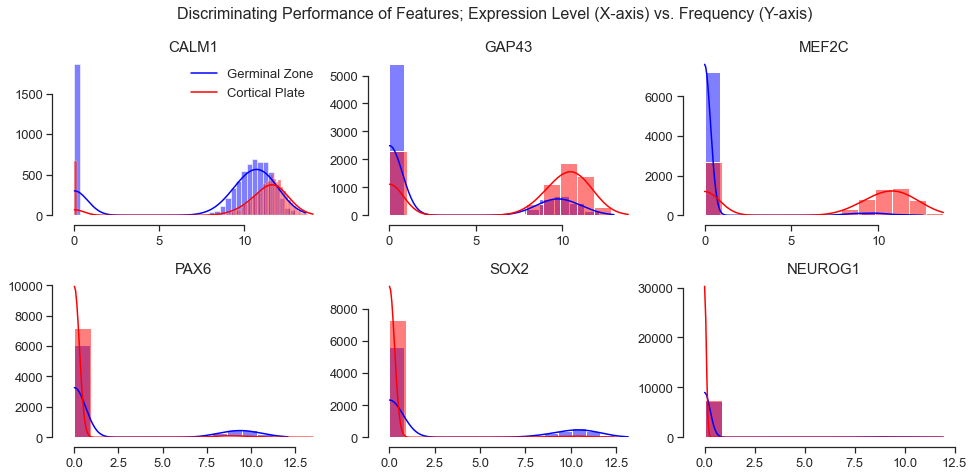

In [350]:
# plot histograms of picked features
picked_genes = ['CALM1', 'GAP43', 'MEF2C','PAX6', 'SOX2', 'NEUROG1']
fig, axes = plt.subplots(2, 3, figsize=(16, 7))
axes = axes.ravel()
for i in range(6):
    ax = axes[i]
    data = X[:, np.where(gene_names==picked_genes[i])[0][0]]
    ax = sns.histplot(data[Y==0], ax=ax, color='blue', kde=True)
    sns.histplot(data[Y==1], ax=ax, color='red', kde=True)
    ax.tick_params(labelsize=13)
    ax.set_ylabel("")
    ax.set_title("{}".format(picked_genes[i]), fontsize=15)
axes[0].legend(["Germinal Zone", "Cortical Plate"], fontsize=13, frameon=False, loc=1)
# box = dict(facecolor='yellow', pad=5, alpha=0.2)
# axes[0].set_ylabel('Wilcoxon Features', bbox=box, fontsize=15)
# axes[3].set_ylabel('Biological Features', bbox=box, fontsize=15)
sns.set_style("white")
sns.set_style("ticks")
sns.despine(offset=10, trim=True)
plt.subplots_adjust(hspace=0.4)
plt.suptitle("Discriminating Performance of Features; Expression Level (X-axis) vs. Frequency (Y-axis)", fontsize=16)

In [160]:
fig.savefig("figures/1-discriminative-histograms.pdf", bbox_inches='tight')

#### Mutual information-based feature selection

In [354]:
# estimate the mututal information between each gene expression and the class label
mi = mutual_info_classif(X_train, Y_train)

In [355]:
sorted_mi_gene_ids = np.flip(np.argsort(mi))
sorted_mi_genes = gene_names[sorted_mi_gene_ids]
sorted_mi = mi[sorted_mi_gene_ids]

In [359]:
print(sorted_mi_genes.tolist())

['MEF2C', 'ARPP21', 'STMN2', 'CHL1', 'SATB2', 'MAP1B', 'GAP43', 'LIMCH1', 'NEFM', 'CALM1', 'RUNX1T1', 'DAB1', 'EZR', 'NCAM1', 'SYT4', 'NELL2', 'MAPT', 'SFRP1', 'ANK2', 'PKIA', 'PTN', 'GRIN2B', 'CCND2', 'SOX2', 'SOX4', 'FAM49A', 'INA', 'ZEB2', 'DLG2', 'UCHL1', 'SCN2A', 'ENC1', 'SHTN1', 'RTN1', 'PLXNA4', 'JUN', 'FAT3', 'HMGB2', 'ZEB1', 'ELMOD1', 'BCL11A', 'MSRA', 'HES1', 'GPR22', 'ADCY1', 'FLRT2', 'H3F3B', 'ZBTB18', 'DYNC1I1', 'PPP1R17', 'LMO3', 'ID4', 'MYT1L', 'RBFOX1', 'PHLDA1', 'GUCY1A2', 'GPM6A', 'FABP5', 'SYT1', 'NBEA', 'NEFL', 'AFF3', 'PCLO', 'VIM', 'SOBP', 'VCAN', 'TUBA1A', 'MKI67', 'SLA', 'DPYSL3', 'C1orf61', 'SLC1A3', 'CREB5', 'MPPED1', 'GNAO1', 'MDK', 'EGR1', 'NEUROD6', 'CACNG8', 'TMSB4X', 'COL11A1', 'NEUROD2', 'HES6', 'FRMD4B', 'MASP1', 'SRGAP1', 'HIST1H4C', 'MIR99AHG', 'PTPRD', 'STMN1', 'EEF1B2', 'DOK5', 'SOX9', 'MIR124-2HG', 'TMSB10', 'CELF2', 'PPP1R1B', 'SLC38A1', 'TUBA1B', 'PAX6', 'MEIS2', 'HMGN2', 'MEG3', 'ENSG00000168824', 'ZNF704', 'FGF12', 'MARCKS', 'CAMK2B', 'SLITRK5'

<BarContainer object of 100 artists>

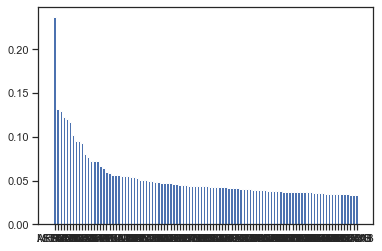

In [356]:
plt.bar(sorted_mi_genes[:100], sorted_mi[:100])

In [140]:
sorted_mi

array([0.24448951, 0.13514439, 0.12997367, ..., 0.        , 0.        ,
       0.        ])

In [144]:
sorted_mi_genes

array(['MEF2C', 'ARPP21', 'STMN2', ..., 'ENSG00000227055', 'MTHFD1P1',
       'GOLGA8J'], dtype=object)

### Classification

#### k-Nearest Neighbors

In [305]:
pool_names = ['10', '100', '1000', "Wilcoxon Feature", "Bio Features", "Wilcoxon+Bio Features"]
pool = [sorted_D[:10], sorted_D[:100], sorted_D[:1000], sorted_D[:10], D_bio, np.union1d(sorted_D[:10], D_bio)]
knn_accuray = []
for k, selected_genes in enumerate(pool):
    X_train_selected = X_train[:, selected_genes]

    # # hyperparameter tuning
    # clf = KNeighborsClassifier()
    # params = {'n_neighbors':np.arange(1, 20)}
    # search = GridSearchCV(clf, params, scoring='accuracy',cv=10)
    # search.fit(X_train_selected, Y_train)

    # compute performance metrics
    skf = StratifiedKFold(n_splits=10)
    metrics = []
    for i, (train_index, test_index) in enumerate(skf.split(X_train_selected, Y_train)):
        X_tr, Y_tr = X_train_selected[train_index], Y_train[train_index]
        X_te, Y_te = X_train_selected[test_index], Y_train[test_index]

        # clf = KNeighborsClassifier(**search.best_params_)
        clf = KNeighborsClassifier(n_neighbors=10)
        clf.fit(X_tr, Y_tr)

        Y_pred = clf.predict(X_te)

        accuracy = accuracy_score(Y_te, Y_pred)
        auc_roc = roc_auc_score(Y_te, clf.predict_proba(X_te)[:, 1])
        tn, fp, fn, tp = confusion_matrix(Y_te, Y_pred).ravel()
        sensitivity = tp / (tp + fn)
        specificity = tn / (tn + fp)
        metrics.append([accuracy, auc_roc, sensitivity, specificity])
    metrics = np.array(metrics)
    knn_accuray.append(metrics[:, 0])
    print("k-NN (feature : {})".format(pool_names[k]))
    # print(search.best_params_)
    print("| metric | Accuracy \t | AUC ROC \t | Sensitivity \t | Specificity \t |")
    print("| mean \t | {:.4f} \t | {:.4f} \t | {:.4f} \t | {:.4f} \t |".format(*np.mean(metrics, axis=0)))
    print("| std \t | {:.4f} \t | {:.4f} \t | {:.4f} \t | {:.4f} \t |".format(*np.std(metrics, axis=0)))
knn_accuray = np.array(knn_accuray)

k-NN (feature : 10)
| metric | Accuracy 	 | AUC ROC 	 | Sensitivity 	 | Specificity 	 |
| mean 	 | 0.8509 	 | 0.9129 	 | 0.8014 	 | 0.8997 	 |
| std 	 | 0.0129 	 | 0.0109 	 | 0.0221 	 | 0.0124 	 |
k-NN (feature : 100)
| metric | Accuracy 	 | AUC ROC 	 | Sensitivity 	 | Specificity 	 |
| mean 	 | 0.8421 	 | 0.9161 	 | 0.7344 	 | 0.9485 	 |
| std 	 | 0.0108 	 | 0.0085 	 | 0.0165 	 | 0.0126 	 |
k-NN (feature : 1000)
| metric | Accuracy 	 | AUC ROC 	 | Sensitivity 	 | Specificity 	 |
| mean 	 | 0.7489 	 | 0.8862 	 | 0.5103 	 | 0.9844 	 |
| std 	 | 0.0144 	 | 0.0111 	 | 0.0292 	 | 0.0071 	 |
k-NN (feature : Wilcoxon Feature)
| metric | Accuracy 	 | AUC ROC 	 | Sensitivity 	 | Specificity 	 |
| mean 	 | 0.8509 	 | 0.9129 	 | 0.8014 	 | 0.8997 	 |
| std 	 | 0.0129 	 | 0.0109 	 | 0.0221 	 | 0.0124 	 |
k-NN (feature : Bio Features)
| metric | Accuracy 	 | AUC ROC 	 | Sensitivity 	 | Specificity 	 |
| mean 	 | 0.6178 	 | 0.6452 	 | 0.8410 	 | 0.3973 	 |
| std 	 | 0.0265 	 | 0.0147 	 | 0.2441 	 |

In [306]:
knn_roc = []
for k, selected_genes in enumerate(pool):
    X_train_selected = X_train[:, selected_genes]

    # refit on the whole training set
    clf = KNeighborsClassifier(n_neighbors=10)
    clf.fit(X_train_selected, Y_train)

    # evaluate on test set 
    X_test_selected = X_test[:, selected_genes]

    Y_pred = clf.predict(X_test_selected)

    accuracy = accuracy_score(Y_test, Y_pred)
    auc_roc = roc_auc_score(Y_test, clf.predict_proba(X_test_selected)[:, 1])
    tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    metrics = [accuracy, auc_roc, sensitivity, specificity]

    roc = roc_curve(Y_test, clf.predict_proba(X_test_selected)[:, 1])
    knn_roc.append(roc)

    print("k-NN (feature : {})".format(pool_names[k]))
    print("| Accuracy \t | AUC ROC \t | Sensitivity \t | Specificity \t |")
    print("| {:.4f} \t | {:.4f} \t | {:.4f} \t | {:.4f} \t |".format(*metrics))
knn_roc = np.array(knn_roc)

k-NN (feature : 10)
| Accuracy 	 | AUC ROC 	 | Sensitivity 	 | Specificity 	 |
| 0.8550 	 | 0.9163 	 | 0.8110 	 | 0.8984 	 |
k-NN (feature : 100)
| Accuracy 	 | AUC ROC 	 | Sensitivity 	 | Specificity 	 |
| 0.8465 	 | 0.9213 	 | 0.7399 	 | 0.9518 	 |
k-NN (feature : 1000)
| Accuracy 	 | AUC ROC 	 | Sensitivity 	 | Specificity 	 |
| 0.7471 	 | 0.8962 	 | 0.5092 	 | 0.9822 	 |
k-NN (feature : Wilcoxon Feature)
| Accuracy 	 | AUC ROC 	 | Sensitivity 	 | Specificity 	 |
| 0.8550 	 | 0.9163 	 | 0.8110 	 | 0.8984 	 |
k-NN (feature : Bio Features)
| Accuracy 	 | AUC ROC 	 | Sensitivity 	 | Specificity 	 |
| 0.5304 	 | 0.6565 	 | 0.0945 	 | 0.9611 	 |
k-NN (feature : Wilcoxon+Bio Features)
| Accuracy 	 | AUC ROC 	 | Sensitivity 	 | Specificity 	 |
| 0.8581 	 | 0.9188 	 | 0.8140 	 | 0.9017 	 |


#### Linear Discriminant Analysis

In [307]:
pool_names = ['10', '100', '1000', "Wilcoxon Feature", "Bio Features", "Wilcoxon+Bio Features"]
pool = [sorted_D[:10], sorted_D[:100], sorted_D[:1000], sorted_D[:10], D_bio, np.union1d(sorted_D[:10], D_bio)]
lda_accuray = []
for k, selected_genes in enumerate(pool):
    X_train_selected = X_train[:, selected_genes]

    # compute performance metrics
    skf = StratifiedKFold(n_splits=10)
    metrics = []
    for i, (train_index, test_index) in enumerate(skf.split(X_train_selected, Y_train)):
        X_tr, Y_tr = X_train_selected[train_index], Y_train[train_index]
        X_te, Y_te = X_train_selected[test_index], Y_train[test_index]

        clf = LinearDiscriminantAnalysis()
        clf.fit(X_tr, Y_tr)

        Y_pred = clf.predict(X_te)

        accuracy = accuracy_score(Y_te, Y_pred)
        auc_roc = roc_auc_score(Y_te, clf.predict_proba(X_te)[:, 1])
        tn, fp, fn, tp = confusion_matrix(Y_te, Y_pred).ravel()
        sensitivity = tp / (tp + fn)
        specificity = tn / (tn + fp)
        metrics.append([accuracy, auc_roc, sensitivity, specificity])
    metrics = np.array(metrics)
    lda_accuray.append(metrics[:, 0])
    print("LDA (feature : {})".format(pool_names[k]))
    print("| metric | Accuracy \t | AUC ROC \t | Sensitivity \t | Specificity \t |")
    print("| mean \t | {:.4f} \t | {:.4f} \t | {:.4f} \t | {:.4f} \t |".format(*np.mean(metrics, axis=0)))
    print("| std \t | {:.4f} \t | {:.4f} \t | {:.4f} \t | {:.4f} \t |".format(*np.std(metrics, axis=0)))
lda_accuray = np.array(lda_accuray)

LDA (feature : 10)
| metric | Accuracy 	 | AUC ROC 	 | Sensitivity 	 | Specificity 	 |
| mean 	 | 0.8481 	 | 0.9174 	 | 0.7896 	 | 0.9059 	 |
| std 	 | 0.0110 	 | 0.0084 	 | 0.0164 	 | 0.0153 	 |
LDA (feature : 100)
| metric | Accuracy 	 | AUC ROC 	 | Sensitivity 	 | Specificity 	 |
| mean 	 | 0.8886 	 | 0.9436 	 | 0.8593 	 | 0.9175 	 |
| std 	 | 0.0116 	 | 0.0061 	 | 0.0149 	 | 0.0159 	 |
LDA (feature : 1000)
| metric | Accuracy 	 | AUC ROC 	 | Sensitivity 	 | Specificity 	 |
| mean 	 | 0.8918 	 | 0.9479 	 | 0.8673 	 | 0.9160 	 |
| std 	 | 0.0119 	 | 0.0055 	 | 0.0148 	 | 0.0174 	 |
LDA (feature : Wilcoxon Feature)
| metric | Accuracy 	 | AUC ROC 	 | Sensitivity 	 | Specificity 	 |
| mean 	 | 0.8481 	 | 0.9174 	 | 0.7896 	 | 0.9059 	 |
| std 	 | 0.0110 	 | 0.0084 	 | 0.0164 	 | 0.0153 	 |
LDA (feature : Bio Features)
| metric | Accuracy 	 | AUC ROC 	 | Sensitivity 	 | Specificity 	 |
| mean 	 | 0.6285 	 | 0.6486 	 | 0.9434 	 | 0.3175 	 |
| std 	 | 0.0136 	 | 0.0121 	 | 0.0086 	 | 0.02

In [308]:
lda_roc = []
for k, selected_genes in enumerate(pool):
    X_train_selected = X_train[:, selected_genes]

    # refit on the whole training set
    clf = LinearDiscriminantAnalysis()
    clf.fit(X_train_selected, Y_train)

    # evaluate on test set 
    X_test_selected = X_test[:, selected_genes]

    Y_pred = clf.predict(X_test_selected)

    accuracy = accuracy_score(Y_test, Y_pred)
    auc_roc = roc_auc_score(Y_test, clf.predict_proba(X_test_selected)[:, 1])
    tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    metrics = [accuracy, auc_roc, sensitivity, specificity]

    roc = roc_curve(Y_test, clf.predict_proba(X_test_selected)[:, 1])
    lda_roc.append(roc)

    print("LDA (feature : {})".format(pool_names[k]))
    print("| Accuracy \t | AUC ROC \t | Sensitivity \t | Specificity \t |")
    print("| {:.4f} \t | {:.4f} \t | {:.4f} \t | {:.4f} \t |".format(*metrics))
lda_roc = np.array(lda_roc)

LDA (feature : 10)
| Accuracy 	 | AUC ROC 	 | Sensitivity 	 | Specificity 	 |
| 0.8543 	 | 0.9203 	 | 0.7983 	 | 0.9096 	 |
LDA (feature : 100)
| Accuracy 	 | AUC ROC 	 | Sensitivity 	 | Specificity 	 |
| 0.8953 	 | 0.9468 	 | 0.8725 	 | 0.9179 	 |
LDA (feature : 1000)
| Accuracy 	 | AUC ROC 	 | Sensitivity 	 | Specificity 	 |
| 0.8986 	 | 0.9502 	 | 0.8731 	 | 0.9238 	 |
LDA (feature : Wilcoxon Feature)
| Accuracy 	 | AUC ROC 	 | Sensitivity 	 | Specificity 	 |
| 0.8543 	 | 0.9203 	 | 0.7983 	 | 0.9096 	 |
LDA (feature : Bio Features)
| Accuracy 	 | AUC ROC 	 | Sensitivity 	 | Specificity 	 |
| 0.6383 	 | 0.6577 	 | 0.9489 	 | 0.3315 	 |
LDA (feature : Wilcoxon+Bio Features)
| Accuracy 	 | AUC ROC 	 | Sensitivity 	 | Specificity 	 |
| 0.8555 	 | 0.9240 	 | 0.8037 	 | 0.9067 	 |


/var/folders/gh/4z024hy17rnf9wmws7wgff6w0000gn/T/ipykernel_410/3222667952.py:27: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  lda_roc = np.array(lda_roc)


#### Random Forest 

In [309]:
pool_names = ['10', '100', '1000', "Wilcoxon Feature", "Bio Features", "Wilcoxon+Bio Features"]
pool = [sorted_D[:10], sorted_D[:100], sorted_D[:1000], sorted_D[:10], D_bio, np.union1d(sorted_D[:10], D_bio)]
rf_accuray = []
for k, selected_genes in enumerate(pool):
    X_train_selected = X_train[:, selected_genes]

    # # hyperparameter tuning
    # clf = RandomForestClassifier(n_estimators=500)
    # params = {'min_samples_split':np.arange(2, 20)}
    # search = GridSearchCV(clf, params, scoring='accuracy',cv=10)
    # search.fit(X_train_selected, Y_train)

    # compute performance metrics
    skf = StratifiedKFold(n_splits=10)
    metrics = []
    for i, (train_index, test_index) in enumerate(skf.split(X_train_selected, Y_train)):
        X_tr, Y_tr = X_train_selected[train_index], Y_train[train_index]
        X_te, Y_te = X_train_selected[test_index], Y_train[test_index]

        clf = RandomForestClassifier(n_estimators=500)
        clf.fit(X_tr, Y_tr)

        Y_pred = clf.predict(X_te)

        accuracy = accuracy_score(Y_te, Y_pred)
        auc_roc = roc_auc_score(Y_te, clf.predict_proba(X_te)[:, 1])
        tn, fp, fn, tp = confusion_matrix(Y_te, Y_pred).ravel()
        sensitivity = tp / (tp + fn)
        specificity = tn / (tn + fp)
        metrics.append([accuracy, auc_roc, sensitivity, specificity])
    metrics = np.array(metrics)
    rf_accuray.append(metrics[:, 0])
    print("RF (feature : {})".format(pool_names[k]))
    # print(search.best_params_)
    print("| metric | Accuracy \t | AUC ROC \t | Sensitivity \t | Specificity \t |")
    print("| mean \t | {:.4f} \t | {:.4f} \t | {:.4f} \t | {:.4f} \t |".format(*np.mean(metrics, axis=0)))
    print("| std \t | {:.4f} \t | {:.4f} \t | {:.4f} \t | {:.4f} \t |".format(*np.std(metrics, axis=0)))
rf_accuray = np.array(lda_accuray)

RF (feature : 10)
| metric | Accuracy 	 | AUC ROC 	 | Sensitivity 	 | Specificity 	 |
| mean 	 | 0.8677 	 | 0.9301 	 | 0.8599 	 | 0.8753 	 |
| std 	 | 0.0113 	 | 0.0063 	 | 0.0155 	 | 0.0159 	 |
RF (feature : 100)
| metric | Accuracy 	 | AUC ROC 	 | Sensitivity 	 | Specificity 	 |
| mean 	 | 0.8885 	 | 0.9470 	 | 0.8824 	 | 0.8945 	 |
| std 	 | 0.0126 	 | 0.0068 	 | 0.0126 	 | 0.0160 	 |
RF (feature : 1000)
| metric | Accuracy 	 | AUC ROC 	 | Sensitivity 	 | Specificity 	 |
| mean 	 | 0.8937 	 | 0.9488 	 | 0.8847 	 | 0.9026 	 |
| std 	 | 0.0147 	 | 0.0056 	 | 0.0139 	 | 0.0194 	 |
RF (feature : Wilcoxon Feature)
| metric | Accuracy 	 | AUC ROC 	 | Sensitivity 	 | Specificity 	 |
| mean 	 | 0.8691 	 | 0.9301 	 | 0.8599 	 | 0.8782 	 |
| std 	 | 0.0100 	 | 0.0067 	 | 0.0149 	 | 0.0143 	 |
RF (feature : Bio Features)
| metric | Accuracy 	 | AUC ROC 	 | Sensitivity 	 | Specificity 	 |
| mean 	 | 0.6143 	 | 0.6228 	 | 0.9181 	 | 0.3144 	 |
| std 	 | 0.0119 	 | 0.0170 	 | 0.0143 	 | 0.0225 	 

In [310]:
rf_roc = []
for k, selected_genes in enumerate(pool):
    X_train_selected = X_train[:, selected_genes]

    # refit on the whole training set
    clf = RandomForestClassifier(n_estimators=500)
    clf.fit(X_train_selected, Y_train)

    # evaluate on test set 
    X_test_selected = X_test[:, selected_genes]

    Y_pred = clf.predict(X_test_selected)

    accuracy = accuracy_score(Y_test, Y_pred)
    auc_roc = roc_auc_score(Y_test, clf.predict_proba(X_test_selected)[:, 1])
    tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    metrics = [accuracy, auc_roc, sensitivity, specificity]

    roc = roc_curve(Y_test, clf.predict_proba(X_test_selected)[:, 1])
    rf_roc.append(roc)

    print("RF (feature : {})".format(pool_names[k]))
    print("| Accuracy \t | AUC ROC \t | Sensitivity \t | Specificity \t |")
    print("| {:.4f} \t | {:.4f} \t | {:.4f} \t | {:.4f} \t |".format(*metrics))
rf_roc = np.array(rf_roc)

RF (feature : 10)
| Accuracy 	 | AUC ROC 	 | Sensitivity 	 | Specificity 	 |
| 0.8787 	 | 0.9312 	 | 0.8788 	 | 0.8786 	 |
RF (feature : 100)
| Accuracy 	 | AUC ROC 	 | Sensitivity 	 | Specificity 	 |
| 0.8971 	 | 0.9503 	 | 0.8972 	 | 0.8971 	 |
RF (feature : 1000)
| Accuracy 	 | AUC ROC 	 | Sensitivity 	 | Specificity 	 |
| 0.9019 	 | 0.9526 	 | 0.9005 	 | 0.9034 	 |
RF (feature : Wilcoxon Feature)
| Accuracy 	 | AUC ROC 	 | Sensitivity 	 | Specificity 	 |
| 0.8800 	 | 0.9316 	 | 0.8788 	 | 0.8813 	 |
RF (feature : Bio Features)
| Accuracy 	 | AUC ROC 	 | Sensitivity 	 | Specificity 	 |
| 0.6215 	 | 0.6282 	 | 0.9235 	 | 0.3232 	 |
RF (feature : Wilcoxon+Bio Features)
| Accuracy 	 | AUC ROC 	 | Sensitivity 	 | Specificity 	 |
| 0.8802 	 | 0.9322 	 | 0.8785 	 | 0.8819 	 |


/var/folders/gh/4z024hy17rnf9wmws7wgff6w0000gn/T/ipykernel_410/1315715213.py:27: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  rf_roc = np.array(rf_roc)


#### Comparisons

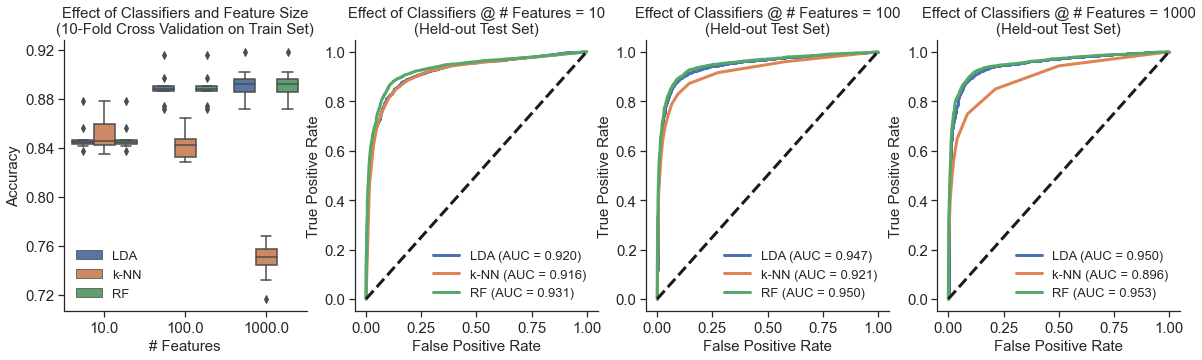

In [329]:
temp = np.concatenate((10*np.ones(10), 100*np.ones(10), 1000*np.ones(10)))
df_metrics = pd.DataFrame(
    {
    "accuracy" : np.concatenate((lda_accuray[:3].ravel(), knn_accuray[:3].ravel(), rf_accuray[:3].ravel())),
    "num_features": np.concatenate((temp, temp, temp)),
    "classifier": np.concatenate((["LDA"]*30, ["k-NN"]*30, ["RF"]*30))
    }
)

fig, axes = plt.subplots(1, 4, figsize=(20, 5))

ax = axes[0]
sns.boxplot(data=df_metrics, x="num_features", y="accuracy", hue="classifier", ax=ax)
ax.tick_params(labelsize=15)
ax.set_ylabel("Accuracy", fontsize=15)
ax.set_xlabel("# Features", fontsize=15)
ax.legend(fontsize=13, frameon=False)
ax.yaxis.set_major_locator(MaxNLocator(6))
ax.set_title("Effect of Classifiers and Feature Size" + "\n" + "(10-Fold Cross Validation on Train Set)", fontsize=15)
sns.set_style("white")
sns.set_style("ticks")
sns.despine()

F = [10, 100, 1000]
for i in range(3):
    ax = axes[i+1]
    ax.plot(lda_roc[:3][i][0], lda_roc[:3][i][1], lw=3, label="LDA (AUC = {:.3f})".format(auc(lda_roc[:3][i][0], lda_roc[:3][i][1])))
    ax.plot(knn_roc[:3][i][0], knn_roc[:3][i][1], lw=3, label="k-NN (AUC = {:.3f})".format(auc(knn_roc[:3][i][0], knn_roc[:3][i][1])))
    ax.plot(rf_roc[:3][i][0], rf_roc[:3][i][1], lw=3, label="RF (AUC = {:.3f})".format(auc(rf_roc[:3][i][0], rf_roc[:3][i][1])))
    ax.plot([0, 1], [0, 1], c='k', lw=3, ls='dashed')
    ax.tick_params(labelsize=15)
    ax.set_ylabel("True Positive Rate", fontsize=15)
    ax.set_xlabel("False Positive Rate", fontsize=15)
    ax.legend(fontsize=13, frameon=False)
    ax.set_title("Effect of Classifiers @ # Features = {}".format(F[i]) + "\n" + "(Held-out Test Set)", fontsize=15)



In [330]:
fig.savefig("figures/2-classifier-and-feature-num-effect.pdf", bbox_inches='tight')

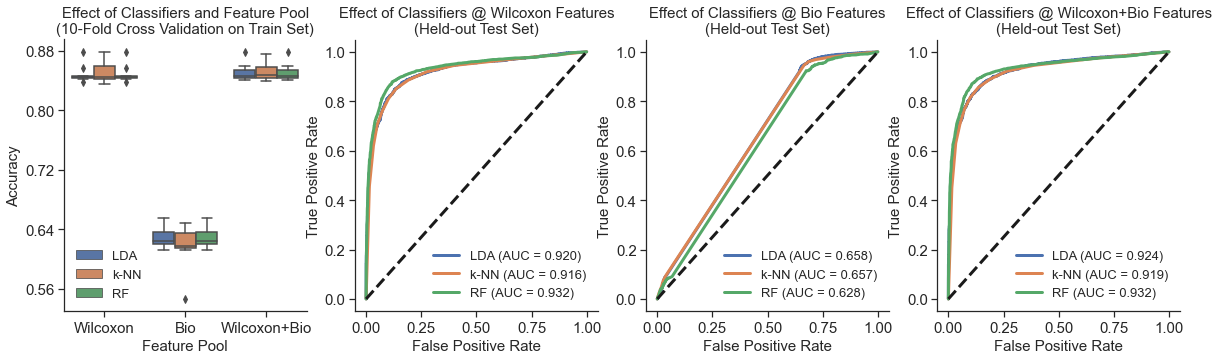

In [331]:
temp = np.concatenate((["Wilcoxon"]*10, ["Bio"]*10, ["Wilcoxon+Bio"]*10))
df_metrics = pd.DataFrame(
    {
    "accuracy" : np.concatenate((lda_accuray[3:].ravel(), knn_accuray[3:].ravel(), rf_accuray[3:].ravel())),
    "num_features": np.concatenate((temp, temp, temp)),
    "classifier": np.concatenate((["LDA"]*30, ["k-NN"]*30, ["RF"]*30))
    }
)

fig, axes = plt.subplots(1, 4, figsize=(20, 5))

ax = axes[0]
sns.boxplot(data=df_metrics, x="num_features", y="accuracy", hue="classifier", ax=ax)
ax.tick_params(labelsize=15)
ax.set_ylabel("Accuracy", fontsize=15)
ax.set_xlabel("Feature Pool", fontsize=15)
ax.legend(fontsize=13, frameon=False)
ax.yaxis.set_major_locator(MaxNLocator(6))
ax.set_title("Effect of Classifiers and Feature Pool" + "\n" + "(10-Fold Cross Validation on Train Set)", fontsize=15)
sns.set_style("white")
sns.set_style("ticks")
sns.despine()

F = ["Wilcoxon Features", "Bio Features", "Wilcoxon+Bio Features"]
for i in range(3):
    ax = axes[i+1]
    ax.plot(lda_roc[3:][i][0], lda_roc[3:][i][1], lw=3, label="LDA (AUC = {:.3f})".format(auc(lda_roc[3:][i][0], lda_roc[3:][i][1])))
    ax.plot(knn_roc[3:][i][0], knn_roc[3:][i][1], lw=3, label="k-NN (AUC = {:.3f})".format(auc(knn_roc[3:][i][0], knn_roc[3:][i][1])))
    ax.plot(rf_roc[3:][i][0], rf_roc[3:][i][1], lw=3, label="RF (AUC = {:.3f})".format(auc(rf_roc[3:][i][0], rf_roc[3:][i][1])))
    ax.plot([0, 1], [0, 1], c='k', lw=3, ls='dashed')
    ax.tick_params(labelsize=15)
    ax.set_ylabel("True Positive Rate", fontsize=15)
    ax.set_xlabel("False Positive Rate", fontsize=15)
    ax.legend(fontsize=13, frameon=False)
    ax.set_title("Effect of Classifiers @ {}".format(F[i]) + "\n" + "(Held-out Test Set)", fontsize=15)

plt.subplots_adjust(hspace=0.4)

In [332]:
fig.savefig("figures/3-classifier-and-feature-pool-effect.pdf", bbox_inches='tight')